<a href="https://colab.research.google.com/github/akshaygrao77/Deep-learning-assignment1/blob/Question-3/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import math
from decimal import *
# Only used to show progressbar while inside an epoch
from tqdm.notebook import tqdm 

In [44]:
# !pip install wandb
# !wandb login

In [45]:
# import wandb

# wandb.init(project="Deep learning assignment1", entity="akshaygrao")

In [46]:
# wandb.config = {
#   "learning_rate": 0.001,
#   "epochs": 100,
#   "batch_size": 128
# }

# **Question 1 starts**

Loading dataset from fashio-mnist

In [47]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [48]:
def print_image_per_class():
  num_class=10
  for cls in range(num_class):
    i=0
    while(True):
      i=i+1
      if(y_train[i] == cls):
        # image = x_train[i]
        plt.imshow( x_train[i], cmap='gray')
        plt.show()
        plt.close()
        break;

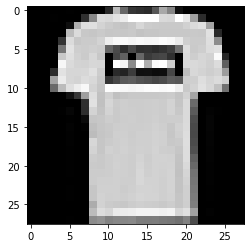

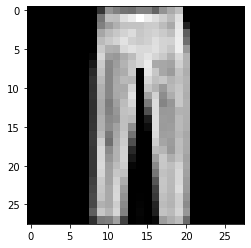

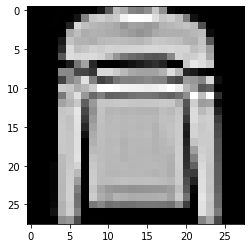

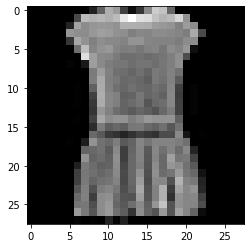

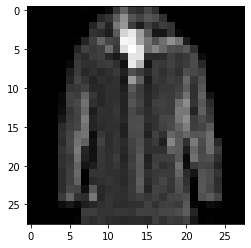

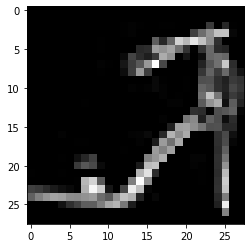

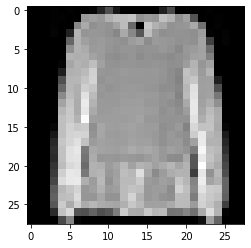

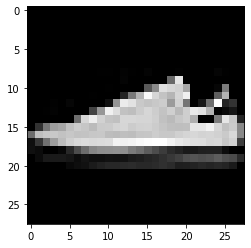

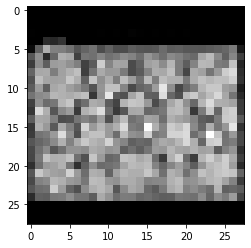

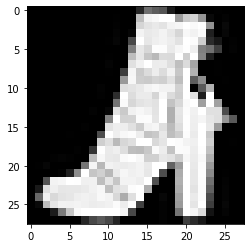

In [49]:
print_image_per_class()

# **Question 2 starts**

In [50]:
x_train.shape

(60000, 28, 28)

In [51]:
x_test.shape

(10000, 28, 28)

Flatten each image into a 1-d array to input to the network

In [52]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

Normalise the array to [0,1] interval

In [53]:
# x_train = x_train + 1
# x_test = x_test + 1
x_train = x_train / 255
x_test = x_test / 255

In [54]:
x_train.shape

(60000, 784)

In [55]:
x_test.shape

(10000, 784)

Categorical encoding for labels

In [56]:
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_test = keras.utils.to_categorical(y_test, num_categories)

In [57]:
y_train.shape

(60000, 10)

In [58]:
y_test.shape

(10000, 10)

In [59]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [60]:
class Activation:
    def computeSoftmaxGrad(self,H):
      grad_softmax_jacobian = np.zeros(H.shape[0]*H.shape[0]).reshape(H.shape[0],H.shape[0])
      for i in range(H.shape[0]):
        for j in range(H.shape[0]):
          if(i == j):
            grad_softmax_jacobian[i][j] = H[i]*(1-H[j])
          else:
            grad_softmax_jacobian[i][j] = -H[i]*H[j]
      return grad_softmax_jacobian
  
    def computeSigmoidGrad(self,H):
      # print("Grad Sigmoid ",H)
      # print("number of non-zeros in H:",np.count_nonzero(H))
      ret = H*(1-H)
      # print("Ret ",ret)
      # print("number of non-zeros in ret:",np.count_nonzero(ret))
      return ret 

    def computeTanhGrad(self,H):
      ret = 1 - H**2
      if(~(np.isfinite(ret).all())):
        if(np.isnan(ret).any()):
          print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
          print("Gradient Tanh ret",ret)
        ret = replaceNanWithMaxAndMin(ret)
      return ret 
    
    def computeReluGrad(self,A):
       return 1.0 * (A > 0)

    def sigmoid(self, X):
      # print("Sigmoid",X)
      exp = np.exp(-X)
      # print("Exp:",exp)
      if(~(np.isfinite(exp).all())):
        if(np.isnan(exp).any()):
          print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
          print("Sigmoid X",X)
          print("Sigmoid exp before",exp)
        exp = replaceNanWithMaxAndMin(exp)
      
      ret = 1.0 / (1.0 + exp)
      # print("Ret sigmoid:",ret)
      return ret

    def relu(self,X):
      ret = np.maximum(0.0,X)
      return ret
    
    def tanh(self,X):
      ret = np.tanh(X)
      if(~(np.isfinite(ret).all())):
        if(np.isnan(ret).any()):
          print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
          print("Tanh ret",ret)
        ret = replaceNanWithMaxAndMin(ret)
      return ret

    def softmax(self, X):
      Z = X-max(X)
      exps = np.exp(Z)
      if(~(np.isfinite(exps).all())):
        if(np.isnan(exps).any()):
          print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
          print("softmax X",X)
          print("softmax exps",exps)
        exps = replaceNanWithMaxAndMin(exps)
      
      sum = np.sum(exps)
      if(~(np.isfinite(sum).all())):
        if(np.isnan(sum).any()):
          print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
          print("softmax sum",sum)
        sum = replaceNanWithMaxAndMin(sum)

      ret = exps / sum
      if(~(np.isfinite(ret).all())):
        if(np.isnan(ret).any()):
          print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
          print("softmax exps",exps)
          print("softmax sum",sum)
          print("softmax ret",ret)
        ret = replaceNanWithMaxAndMin(ret)

      if(~(np.isfinite(ret).all())):
          print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
          print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
          print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
          print("softmax X",X)
          print("softmax np.sum(exps)",np.sum(exps))
          print("softmax exps",exps)
      return ret

In [61]:
  def replaceNanWithMaxAndMin(X):
    if(np.isscalar(X)):
      if(X == float("inf")):
          X = 1e+306
      elif(X == float("-inf")):
          X = 1e-306
      else:
        X = 1e-306
    else:
      if(~(np.isfinite(X).all())):
        nan_indices = np.argwhere(~(np.isfinite(X))).flatten()
        # print("nan_indices",nan_indices)
        for ind in nan_indices:
          # print("Ind",ind)
          # print("X[ind]",X[ind])
          if(X[ind] == float("inf")):
            X[ind] = 1e+306
          elif(X[ind] == float("-inf")):
            X[ind] = 1e-306
          else:
            X[ind] = 1e-306
    return X
      

In [62]:
class InputLayer:
  number_of_inputs=0

  def __init__(self,number_of_inputs) -> None:
      self.number_of_inputs = number_of_inputs

In [63]:
class Layer:
  number_of_neurons=0
  activation = 'sigmoid'
  
  def __init__(self,number_of_neurons,activation) -> None:
      self.number_of_neurons = number_of_neurons
      self.activation = activation

In [64]:
class ANNModel:
  def __init__(self):
    self.layers = []

  def addInputLayer(self,input_layer_obj):
    self.input_layer_obj = input_layer_obj
  
  def addLayer(self,layer_obj):
    self.layers.append(layer_obj)
  
  def compile(self,loss):
    self.loss = loss
    self.randInitWeights()
    self.randInitBiases()
    self.initAH()
    self.array_grad_L_by_A = [None]*(len(self.layers))
    self.array_grad_L_by_weight = [None]*(len(self.layers))
    self.array_grad_L_by_bias = [None]*(len(self.layers))
    self.array_grad_L_by_H = [None]*(len(self.layers))
    
  def initAH(self):
    self.A = []
    for l in range(len(self.layers)):
      self.A.append(np.zeros(self.layers[l].number_of_neurons))
    
    self.H = []
    self.H.append(np.zeros(self.input_layer_obj.number_of_inputs))
    for l in range(1,len(self.layers)+1):
      self.H.append(np.zeros(self.layers[l-1].number_of_neurons))
    
    # print(self.A)
    # print(self.H)

  def randInitWeights(self):
    self.weight_array=[np.random.normal(size=(self.input_layer_obj.number_of_inputs,self.layers[0].number_of_neurons))]
    # print(self.weight_array)
    # print(self.weight_array[0].shape)
    for l in range(1,len(self.layers)):
      self.weight_array.append(np.random.normal(size=(self.layers[l-1].number_of_neurons,self.layers[l].number_of_neurons)))
    #   print(self.weight_array[l].shape)
    # print(self.weight_array)
    # print(len(self.weight_array))

  def randInitBiases(self):
    self.bias = []
    for l in range(len(self.layers)):
      self.bias.append(np.random.rand(self.layers[l].number_of_neurons))
      # print(self.bias)
      # print(self.bias[l].shape)

  def predict(self,x_test):
    y_pred = [None]*x_test.shape[0]
    for index in range(x_test.shape[0]):
      y_pred[index] = self.feed_forward(x_test[index])
    y_pred = np.asarray(y_pred)
    return y_pred
  
  def initializeOptimizerStructures(self,optimizer='vanilla'):
    if(optimizer == 'momentum'):
      self.prev_weight_update=[np.zeros((self.input_layer_obj.number_of_inputs,self.layers[0].number_of_neurons))]
      for l in range(1,len(self.layers)):
        self.prev_weight_update.append(np.zeros((self.layers[l-1].number_of_neurons,self.layers[l].number_of_neurons)))
      
      self.prev_bias_update = []
      for l in range(len(self.layers)):
       self.prev_bias_update.append(np.zeros(self.layers[l].number_of_neurons))
  
  def resetAccumulatedWeightsAndBiases(self):
    self.accumulated_array_grad_L_by_weight=[np.zeros((self.input_layer_obj.number_of_inputs,self.layers[0].number_of_neurons))]
    for l in range(1,len(self.layers)):
      self.accumulated_array_grad_L_by_weight.append(np.zeros((self.layers[l-1].number_of_neurons,self.layers[l].number_of_neurons)))
    self.accumulated_array_grad_L_by_bias = []
    for l in range(len(self.layers)):
      self.accumulated_array_grad_L_by_bias.append(np.random.rand(self.layers[l].number_of_neurons))
  
  # x_valid and y_valid is used only to just check test accuracy during each epoch. It is strictly not part of training
  def train(self,x_train,y_train,epochs,optimizer='vanilla',learning_rate=1,verbose=1,batch_size=10,x_valid=None,y_valid=None):
    self.resetAccumulatedWeightsAndBiases()
    num_points_seen = 0
    self.initializeOptimizerStructures(optimizer)
    self.verbose=verbose
    if(self.verbose >= 4):
      self.print_state()
    for current_epoch in range(epochs):
      if(self.verbose >=2):
        print("\n &&&&&&&&&&&&&&&&&&&&  Epoch ",current_epoch," &&&&&&&&&&&&&&&&&&&&&&&&")
      sum_of_loss = 0
      # for index in tqdm(range(10)):
      for index in tqdm(range(x_train.shape[0])):
        if(self.verbose >= 3):
          print("Data point number:",index)
        y_pred = self.feed_forward(x_train[index])
        self.back_prop(y_pred,y_train[index])
        for l in range(len(self.layers)):
          self.accumulated_array_grad_L_by_weight[l] = self.accumulated_array_grad_L_by_weight[l] + self.array_grad_L_by_weight[l]
        for l in range(len(self.layers)):
          self.accumulated_array_grad_L_by_bias[l] = self.accumulated_array_grad_L_by_bias[l] + self.array_grad_L_by_bias[l]
        num_points_seen = num_points_seen + 1
        
        if(self.verbose >= 3):
          print("Predicted output:",y_pred)
          print("Actual output:",y_train[index])
        current_loss = computeLoss(y_pred,y_train[index],self.loss)
        sum_of_loss = sum_of_loss + current_loss
        if(self.verbose >= 4):
          self.print_state()
        if(self.verbose >= 3):
          print("Loss:",current_loss)
        
        if(num_points_seen % batch_size == 0 or num_points_seen == x_train.shape[0]):
          self.updateParameters(optimizer,learning_rate)
          self.resetAccumulatedWeightsAndBiases()
      
      if(self.verbose >= 2):
        print("Average ",self.loss, " loss: ",(sum_of_loss/x_train.shape[0]))
        self.showTrainAndTestAccuracyPostTraining(x_train,y_train,x_valid,y_valid)
  
  def showTrainAndTestAccuracyPostTraining(self,x_train,y_train,x_valid,y_valid):
    y_pred_train = self.predict(x_train)
    train_accuracy = calculateClassificationAccuracy(y_pred_train,y_train)
    print("Train accuracy ",train_accuracy)
    if(not(x_valid is None or y_valid is None)):
      y_pred_test = self.predict(x_valid)
      test_accuracy = calculateClassificationAccuracy(y_pred_test,y_valid)
      print("Test accuracy ",test_accuracy)

  def updateParameters(self,optimizer='vanilla',learning_rate=1):
    for l in range(len(self.layers)):
      allzeros = not np.any(self.accumulated_array_grad_L_by_weight[l])
      if(allzeros == True):
        # self.verbose=4.5
        print("Weight update zero %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
        print("self.accumulated_array_grad_L_by_weight[",l,"]:",self.accumulated_array_grad_L_by_weight[l])
        print("number of non-zeros in accumulated_array_grad_L_by_weight gradient:",np.count_nonzero(self.accumulated_array_grad_L_by_weight[l]))

    
    if(optimizer == 'vanilla'):
      for l in range(len(self.layers)):
        self.weight_array[l] = self.weight_array[l] - (learning_rate)*self.accumulated_array_grad_L_by_weight[l]
        self.bias[l]=(self.bias[l] - (learning_rate)*self.accumulated_array_grad_L_by_bias[l])[0]
    elif(optimizer == 'momentum'):
      gamma = 0.9

      for l in range(len(self.layers)):
        self.prev_weight_update[l] = gamma * self.prev_weight_update[l] + (learning_rate)* self.accumulated_array_grad_L_by_weight[l]
        self.prev_bias_update[l] = (gamma * self.prev_bias_update[l] + (learning_rate)* self.accumulated_array_grad_L_by_bias[l])[0]  
        self.weight_array[l] = self.weight_array[l] - self.prev_weight_update[l]
        self.bias[l]=self.bias[l] - self.prev_bias_update[l]
    else:
      pass


  def feed_forward(self,inpX):
    self.H[0]= inpX
    for l in range(len(self.layers)):
      self.A[l]=np.matmul(self.H[l],self.weight_array[l]) + self.bias[l]
      self.H[l+1] = calculateActivation(self.layers[l].activation,self.A[l])
    return self.H[len(self.layers)]
  
  def back_prop(self,y_pred,y_train):
    if(self.verbose >= 5):
      print("Back prop starts ===========================")
    self.grad_L_by_ypred = computeLossGradient(y_pred,y_train,self.loss)
    self.grad_ypred_by_Aoutput = computeGradientHwrtA(y_pred,self.A[len(self.layers)-1],self.layers[len(self.layers)-1].activation)
    if(len(self.grad_ypred_by_Aoutput.shape)==2):
      self.array_grad_L_by_A[len(self.layers)-1]=np.matmul(self.grad_L_by_ypred,self.grad_ypred_by_Aoutput)
    else:
      self.array_grad_L_by_A[len(self.layers)-1]=np.multiply(self.grad_L_by_ypred,self.grad_ypred_by_Aoutput)
    
    for l in reversed(range(len(self.layers))):
      current_H=self.H[l]
      current_H=current_H[np.newaxis].T
      if(self.verbose >= 5):
        print("current_H:[",l,"]:",current_H.T)
        print("current_H shape:[",l,"]:",current_H.shape)
      current_grad_L_by_A = self.array_grad_L_by_A[l]
      if(len(current_grad_L_by_A.shape)==1):
        current_grad_L_by_A = current_grad_L_by_A[np.newaxis]
      
      if(self.verbose >= 5):
        print("current_grad_L_by_A[",l," ]:",current_grad_L_by_A)
        print("current_grad_L_by_A[",l," ] shape:",current_grad_L_by_A.shape)
      
      self.array_grad_L_by_weight[l]=np.matmul(current_H,current_grad_L_by_A)
      
      # allzeros = not np.any(self.array_grad_L_by_weight[l])
      # if(allzeros == True):
      #   # self.verbose=4.5
      #   print("Weight update zero **************************************************************************************")
      
      # if(self.verbose >= 5):
      #   print("self.array_grad_L_by_weight[",l,"]:",self.array_grad_L_by_weight[l])
      #   print("number of non-zeros in weight gradient:",np.count_nonzero(self.array_grad_L_by_weight[l]))

      
      self.array_grad_L_by_bias[l] = current_grad_L_by_A
      
      if(self.verbose >= 5):
        print("self.array_grad_L_by_bias[",l,"]:",self.array_grad_L_by_bias[l])
      
      self.array_grad_L_by_H[l] = np.matmul(self.weight_array[l],current_grad_L_by_A.T)
      
      # if(self.verbose >= 5):
      #   print("self.array_grad_L_by_H[",l,"]:",self.array_grad_L_by_H[l].T)
      
      if(l >= 1):
        current_grad_H_by_A = computeGradientHwrtA(self.H[l],self.A[l-1],self.layers[l-1].activation)
        current_grad_H_by_A = current_grad_H_by_A[np.newaxis]
        if(self.verbose >= 5):
          print("current_grad_H_by_A[",l,"]:",current_grad_H_by_A)
        self.array_grad_L_by_A[l-1] = np.multiply(self.array_grad_L_by_H[l].T,current_grad_H_by_A)
        if(self.verbose >= 5):
          print("self.array_grad_L_by_A[",(l-1),"]:",self.array_grad_L_by_A[l-1])



  def print_state(self):
    for l in range(len(self.layers)):
      print("Layer",l)
      print("============================")
      print("Activation:",self.layers[l].activation)
      print("Number of units:",self.layers[l].number_of_neurons)
      print("Weights",self.weight_array[l])
      print("Biases",self.bias[l])
      # print("H's [ ",l," ]:",self.H[l])
      print("A's",self.A[l])
      print("**************************")

In [65]:
def calculateClassificationAccuracy(y_pred,y_actual):
  total_samples = y_pred.shape[0]
  correctly_classified_count = 0.0
  for it in range(y_pred.shape[0]):
    classification_index = np.argmax(y_pred[it])
    if(y_actual[it][classification_index]== 1):
      correctly_classified_count= correctly_classified_count + 1
  accuracy = correctly_classified_count/total_samples
  print("Correctly classified:",correctly_classified_count)
  print("total_samples:",total_samples)
  return accuracy

In [66]:
def calculateActivation(activation,A):
  if(activation =='sigmoid'):
    return Activation().sigmoid(A)
  elif(activation == 'softmax'):
    return Activation().softmax(A)
  elif(activation == 'tanh'):
    return Activation().tanh(A)
  elif(activation == 'relu'):
    return Activation().relu(A)
  else:
    print("Invalid activation function")

def computeLoss(y_pred,y_actual,loss):
  loss_value=0
  if(loss=='categorical_crossentropy'):
    # This small epsilon is needed to avoid log(0)=undefined
    epsilon = 1e-300
    # To hold label index from y_actual
    correct_index=findLabelIndex(y_actual)
    loss_value = -math.log(np.maximum(y_pred[correct_index],epsilon),2)
    # loss_value = -np.log2(((y_pred[correct_index])+epsilon))
  return loss_value

def computeLossGradient(y_pred,y_actual,loss):
  grad_L_y = np.zeros(len(y_pred))
  if(loss=='categorical_crossentropy'):
    # This small epsilon is needed to avoid 1/0=inf
    epsilon = 1e-300
    # To hold label index from y_actual
    correct_index=findLabelIndex(y_actual)
    grad_L_y[correct_index] = -1/(np.maximum(y_pred[correct_index],epsilon))
  
  return grad_L_y

def findLabelIndex(y_actual):
  for j in range(len(y_actual)):
    if(y_actual[j]==1):
      return j

def computeGradientHwrtA(H,A,activation):
  grad_H_by_A = []
  # Gradient is a kxk jacobian
  if(activation == 'softmax'):
    grad_H_by_A = Activation().computeSoftmaxGrad(H)
  elif(activation == 'sigmoid'):
    grad_H_by_A = Activation().computeSigmoidGrad(H)
  elif(activation == 'tanh'):
    grad_H_by_A = Activation().computeTanhGrad(H)
  elif(activation == 'relu'):
    grad_H_by_A = Activation().computeReluGrad(H)
  return grad_H_by_A


In [67]:
def runToyTest():
  ann_model = ANNModel()
  input_layer = InputLayer(2)
  hidden_layer1 = Layer(132,activation='sigmoid')
  hidden_layer2 = Layer(10,activation='sigmoid')
  output_layer = Layer(4,activation='softmax')

  ann_model.addInputLayer(input_layer)
  ann_model.addLayer(hidden_layer1)
  # ann_model.addLayer(hidden_layer2)
  ann_model.addLayer(output_layer)

  ann_model.compile('categorical_crossentropy')
  ann_model.train(sample_xtrain,sample_ytrain,1,'momentum',1,4)
  # ann_model.print_state()
  y_pred_test = ann_model.predict(sample_xtrain)
  print(y_pred_test)
  test_accuracy = calculateClassificationAccuracy(y_pred_test,sample_ytrain)
  print("Test Accuracy:",test_accuracy)

In [68]:
# runToyTest()

In [77]:
# np.seterr(all='warn')
ann_model = ANNModel()
input_layer = InputLayer(x_train.shape[1])
hidden_layer2 = Layer(64,activation='sigmoid')
hidden_layer1 = Layer(132,activation='tanh')
# hidden_layer2 = Layer(64,activation='relu')
hidden_layer3 = Layer(64,activation='relu')
output_layer = Layer(10,activation='softmax')

ann_model.addInputLayer(input_layer)
ann_model.addLayer(hidden_layer1)
ann_model.addLayer(hidden_layer2)
ann_model.addLayer(hidden_layer3)
ann_model.addLayer(output_layer)

ann_model.compile('categorical_crossentropy')
ann_model.train(x_train,y_train,5,"momentum",0.001,2,100,x_test,y_test)
# ann_model.print_state()
y_pred_test = ann_model.predict(x_test)
test_accuracy = calculateClassificationAccuracy(y_pred_test,y_test)
print("Test accuracy at end:",test_accuracy)


 &&&&&&&&&&&&&&&&&&&&  Epoch  0  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/60000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  2.052417749447016
Correctly classified: 40279.0
total_samples: 60000
Train accuracy  0.6713166666666667
Correctly classified: 6670.0
total_samples: 10000
Test accuracy  0.667

 &&&&&&&&&&&&&&&&&&&&  Epoch  1  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/60000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  1.1028783881718287
Correctly classified: 43872.0
total_samples: 60000
Train accuracy  0.7312
Correctly classified: 7239.0
total_samples: 10000
Test accuracy  0.7239

 &&&&&&&&&&&&&&&&&&&&  Epoch  2  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/60000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.9825961031406594
Correctly classified: 44859.0
total_samples: 60000
Train accuracy  0.74765
Correctly classified: 7369.0
total_samples: 10000
Test accuracy  0.7369

 &&&&&&&&&&&&&&&&&&&&  Epoch  3  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/60000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.9413719784385896
Correctly classified: 46042.0
total_samples: 60000
Train accuracy  0.7673666666666666
Correctly classified: 7499.0
total_samples: 10000
Test accuracy  0.7499

 &&&&&&&&&&&&&&&&&&&&  Epoch  4  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/60000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.9182816544230473
Correctly classified: 46011.0
total_samples: 60000
Train accuracy  0.76685
Correctly classified: 7579.0
total_samples: 10000
Test accuracy  0.7579
Correctly classified: 7579.0
total_samples: 10000
Test accuracy at end: 0.7579


In [ ]:
sample_xtrain=np.array([[1,2],[2,3],[3,4]])
sample_xtrain=sample_xtrain.astype('uint8')
print(sample_xtrain.shape)
print(sample_xtrain[0])

In [ ]:
sample_ytrain=np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0]])
sample_ytrain=sample_ytrain.astype('float32')
print(sample_ytrain)
print(sample_ytrain.shape)

In [ ]:
np.finfo(np.float64).max

In [ ]:
o = 1.98138316e-84
print(o)
temp = 1.0+o
print(temp)
y=1/temp
print(y)

In [ ]:
ff = np.array([1,2,3,4])
ff = ff[np.newaxis].T
print(ff)
print(ff.shape)
print("FFF",ff.T)
print(ff.shape)

In [ ]:
a=np.array([0,0.1])
print("A",type(a))
np.maximum(a,1e-3)

In [ ]:
def tanh(x):
    t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    dt=1-t**2
    return t,dt

In [ ]:
Activation().tanh(np.array([9]))